In [75]:
!pip install amplpy pyomo -q
!python -m amplpy.modules install coin highs scip gcg -q

In [76]:

from amplpy import modules
import pyomo.environ as pyo
import pandas as pd
import numpy as np
from pyomo.environ import *


import matplotlib.pyplot as plt
import networkx as nx
import requests



# Caso 1

In [77]:
clientes_data = pd.read_csv(r"C:\Users\ACER\OneDrive - Universidad de los Andes\Escritorio\MOS\PROY2_MOS\Proyecto Seneca Libre\case_1_base\Clients.csv")
print(clientes_data.shape)
clientes_data.sample(5)


(24, 5)


,ClientID,LocationID,Product,Longitude,Latitude
16,17,29,25,-74.124639,4.615869
19,20,32,15,-74.121867,4.746625
23,24,36,11,-74.126293,4.577490
7,8,20,20,-74.172075,4.649417
2,3,15,12,-74.107085,4.709494


In [78]:
depositos_data = pd.read_csv(r"C:\Users\ACER\OneDrive - Universidad de los Andes\Escritorio\MOS\PROY2_MOS\Proyecto Seneca Libre\case_1_base\Depots.csv")
print(depositos_data.shape)
depositos_data.sample(5)

(12, 4)


,DepotID,LocationID,Longitude,Latitude
7,8,8,-74.109756,4.678961
1,2,2,-74.109934,4.536383
2,3,3,-74.038548,4.792926
0,1,1,-74.081242,4.750212
8,9,9,-74.095472,4.735973


In [79]:
ubicaciones_data = pd.concat([depositos_data[["LocationID","Longitude", "Latitude"]], clientes_data[["LocationID","Longitude", "Latitude"]]], axis = 0)
print(ubicaciones_data.shape)
ubicaciones_data.sample(15)

(36, 3)


,LocationID,Longitude,Latitude
1,14,-74.075571,4.687821
18,31,-74.049906,4.706188
6,19,-74.022131,4.697499
10,11,-74.109774,4.664703
5,6,-74.124002,4.650463
3,4,-74.067069,4.721678
0,1,-74.081242,4.750212
16,29,-74.124639,4.615869
4,5,-74.138263,4.607707
12,25,-74.096909,4.646217


In [80]:
vehiculos = pd.read_csv(r"C:\Users\ACER\OneDrive - Universidad de los Andes\Escritorio\MOS\PROY2_MOS\Proyecto Seneca Libre\case_1_base\Vehicles.csv")
print(vehiculos.shape)
vehiculos.sample(5)

(12, 3)


,VehicleType,Capacity,Range
1,Gas Car,135.544525,195.690896
8,EV,76.553642,1062.849467
11,Gas Car,131.920000,145.850000
6,EV,100.645676,617.343951
9,Gas Car,78.600000,133.130000


In [81]:
vehiculos_data= pd.read_csv(r"C:\Users\ACER\OneDrive - Universidad de los Andes\Escritorio\MOS\PROY2_MOS\Proyecto Seneca Libre\vehicles_data.csv")
print(vehiculos_data.shape)
vehiculos_data.sample(3)

(3, 9)


,Vehicle,Freight Rate [COP/km],Time Rate [COP/min],Daily Maintenance [COP/day],Recharge/Fuel Cost [COP/(gal or kWh)],Recharge/Fuel Time [min/10 percent charge],Avg. Speed [km/h],Gas Efficiency [km/gal],Electricity Efficency [kWh/km]
2,Solar EV,4000,500,21000,NaN,NaN,NaN,NaN,0.15
0,Gas Car,5000,500,30000,16000.00,0.1,NaN,10.0,NaN
1,Drone,500,500,3000,220.73,2.0,40.0,NaN,0.15


In [82]:
# DataFrame 2 (datos de vehículos)
vehiculos_data = pd.DataFrame({
    'Vehicle': ['Gas Car', 'EV', 'Drone'],
    'Freight Rate [COP/km]': [5000, 4000, 500],
    'Time Rate [COP/min]': [500, 500, 500],
    'Daily Maintenance [COP/day]': [30000, 21000, 3000],
    'Recharge/Fuel Cost [COP/gal or kWh]': [16000, None, 220.73],
    'Recharge/Fuel Time [min/10 percent charge]': [0.1, None, 2.0],
    'Avg. Speed [km/h]': [None, None, 40.0],
    'Gas Efficiency [km/gal]': [10.0, None, None],
    'Electricity Efficiency [kWh/km]': [None, 0.15, 0.15]
})


# Realizar nuevamente el merge entre los DataFrames
vehiculos_info = vehiculos.merge(vehiculos_data, left_on='VehicleType', right_on='Vehicle', how='left')

vehiculos_info.sample(5)

,VehicleType,Capacity,Range,Vehicle,Freight Rate [COP/km],Time Rate [COP/min],Daily Maintenance [COP/day],Recharge/Fuel Cost [COP/gal or kWh],Recharge/Fuel Time [min/10 percent charge],Avg. Speed [km/h],Gas Efficiency [km/gal],Electricity Efficiency [kWh/km]
11,Gas Car,131.920000,145.850000,Gas Car,5000,500,30000,16000.0,0.1,NaN,10.0,NaN
6,EV,100.645676,617.343951,EV,4000,500,21000,NaN,NaN,NaN,NaN,0.15
3,Gas Car,157.901108,173.023042,Gas Car,5000,500,30000,16000.0,0.1,NaN,10.0,NaN
7,EV,62.881578,887.542494,EV,4000,500,21000,NaN,NaN,NaN,NaN,0.15
1,Gas Car,135.544525,195.690896,Gas Car,5000,500,30000,16000.0,0.1,NaN,10.0,NaN


In [83]:
num_clientes = 24
clientes_id = RangeSet(1, num_clientes)

In [84]:
num_vehiculos = 11
vehiculos_r = RangeSet(0, num_vehiculos)

In [85]:
num_tipo_v = 2
tipos_vehiculo = RangeSet(1, num_tipo_v)

In [86]:
num_depositos = 12
deposito_origen = RangeSet(1, num_depositos)  # Definir ciudad de origen


In [87]:
num_ubicaciones = num_clientes + num_depositos
ubicaciones = RangeSet(1, num_ubicaciones)


In [88]:
result = ";".join(f"{row['Longitude']},{row['Latitude']}" for _, row in ubicaciones_data.iterrows())
print(result)
url = f"http://router.project-osrm.org/table/v1/driving/{result}?annotations=distance,duration"

response = requests.get(url)

if response.status_code == 200:
    print(response.json().keys())
else:
    # Manejo de errores
    print("Error:", response.status_code, response.json().get("message", "Unknown error"))
costos_distancia = np.array(response.json()["distances"])/1000
costos_duracion = np.array(response.json()["durations"])/1000
print(costos_distancia.shape, costos_duracion.shape)
costos_distancia, costos_duracion

-74.08124218159384,4.75021190869025;-74.10993358606953,4.5363832206427785;-74.03854814565923,4.792925960208614;-74.06706883098641,4.72167778077445;-74.13826337931849,4.607707046760958;-74.12400186370824,4.650463053612691;-74.09561875464892,4.621911772492814;-74.10975623736951,4.678960680833056;-74.09547235719887,4.735973062153282;-74.10991610076434,4.550640992537941;-74.10977422186991,4.664702960902753;-74.12408925943333,4.5791740634103135;-74.09893796560621,4.59795431125545;-74.07557103763986,4.687820646838871;-74.10708524062704,4.70949446000624;-74.09727965657427,4.605029068682624;-74.16464148202755,4.648463876533332;-74.12083799988112,4.662137416953968;-74.02213076607309,4.697499030379109;-74.17207549744595,4.649416884236942;-74.15615257246444,4.606310650273935;-74.09041145358674,4.557379705282216;-74.17802255204528,4.591594072172954;-74.1015410917749,4.7564172406324055;-74.09690889182339,4.646217006050524;-74.1219200708342,4.725912125314368;-74.0942948461378,4.604168478560718;-74.1

(array([[ 0.    , 33.0616, 10.1619, ..., 20.3231, 12.7272, 26.4218],
        [32.9469,  0.    , 34.1815, ..., 14.3162, 31.4658, 11.1634],
        [14.3307, 38.9127,  0.    , ..., 25.7292, 26.2725, 32.2729],
        ...,
        [19.2004, 14.9417, 21.1949, ...,  0.    , 17.7193,  8.3019],
        [ 9.7937, 29.6986, 22.382 , ..., 16.5151,  0.    , 23.0588],
        [25.255 ,  6.4714, 30.3994, ...,  9.608 , 23.7739,  0.    ]]),
 array([[0.    , 2.5082, 1.0539, ..., 1.3567, 0.8547, 2.0154],
        [2.5025, 0.    , 2.5371, ..., 1.2516, 2.2371, 0.8487],
        [1.1882, 3.1792, 0.    , ..., 2.045 , 1.804 , 2.6864],
        ...,
        [1.4269, 1.2412, 1.446 , ..., 0.    , 1.1615, 0.7484],
        [0.75  , 2.2903, 1.3932, ..., 1.1561, 0.    , 1.7975],
        [1.8727, 0.7657, 2.0921, ..., 0.8593, 1.6073, 0.    ]]))

In [91]:
from pyomo.environ import *
import pandas as pd
import numpy as np

In [92]:
model = pyo.ConcreteModel()

In [93]:
# Eliminar los componentes existentes antes de redefinirlos
if "N" in model.component_map():
    model.del_component("N")
if "C" in model.component_map():
    model.del_component("C")
if "D" in model.component_map():
    model.del_component("D")

In [94]:
model.C = Set(initialize=clientes_data['LocationID'].tolist())  # Clientes
model.D = Set(initialize=depositos_data['LocationID'].tolist())  # Depósitos
vehiculos_info["Vehicle_ID"] = vehiculos_info.index.astype(int)  # Crear un identificador único si no existe
model.V = Set(initialize=vehiculos_info["Vehicle_ID"].tolist())
model.N = Set(initialize=list(model.C) + list(model.D)) # Nodos



In [98]:
# Parámetros ajustados
model.capacity = pyo.Param(model.V, initialize=dict(zip(vehiculos_info["Vehicle_ID"], vehiculos_info["Capacity"])))
model.range = pyo.Param(model.V, initialize=dict(zip(vehiculos_info["Vehicle_ID"], vehiculos_info["Range"])))
model.cost_per_km = pyo.Param(model.V, initialize=dict(zip(vehiculos_info["Vehicle_ID"], vehiculos_info["Freight Rate [COP/km]"])))
model.cost_per_min = pyo.Param(model.V, initialize=dict(zip(vehiculos_info["Vehicle_ID"], vehiculos_info["Time Rate [COP/min]"])))
# Parámetro de costo por unidad de carga transportada (por ejemplo, COP por kg)
model.cost_per_load = pyo.Param(initialize=100)


# Demanda por cliente
model.demand = pyo.Param(model.C, initialize=dict(zip(clientes_data["LocationID"], clientes_data["Product"])))

# Costos por distancia
dist_dict = {
    (ubicaciones_data.iloc[i]["LocationID"], ubicaciones_data.iloc[j]["LocationID"]): costos_distancia[i, j]
    for i in range(num_ubicaciones)
    for j in range(num_ubicaciones)
    if i != j
}

model.distances = pyo.Param(model.N, model.N, initialize=dist_dict, default=0)

# Costos por duración
dura_dict = {
    (ubicaciones_data.iloc[i]["LocationID"], ubicaciones_data.iloc[j]["LocationID"]): costos_duracion[i, j]
    for i in range(num_ubicaciones)
    for j in range(num_ubicaciones)
    if i != j
}

model.durations = pyo.Param(model.N, model.N, initialize=dura_dict, default=0)

# Costo de mantenimiento diario de cada vehículo
model.maintenance_cost = pyo.Param(model.V, initialize=dict(zip(vehiculos_info["Vehicle_ID"], vehiculos_info["Daily Maintenance [COP/day]"])))


In [44]:
del model.x
del model.u
del model.v_use
del model.carga

In [100]:
# Variables binarias para rutas
model.x = pyo.Var(model.N, model.N, model.V, domain=pyo.Binary)

# Variable auxiliar para el orden de visita
model.u = pyo.Var(model.C, model.V, within=pyo.NonNegativeIntegers)

# Varaible auxiliar para saber si un vehículo es utilizado
model.v_use = pyo.Var(model.V, within=pyo.Binary)

# Variable que controla la carga que lleva cada vehiculo
model.carga = pyo.Var(model.N, model.N, model.V, domain=pyo.NonNegativeReals)


In [101]:
if "objective" in model.component_map():
    model.del_component("objective")

In [102]:
# Función objetivo ajustada
def objective_rule(model):
    # Costo por distancia recorrida
    cost_distance = sum(model.cost_per_km[v] * model.distances[i, j] * model.x[i, j, v]
                        for v in model.V for i in model.N for j in model.N if i != j)
    
    # Costo por duración del trayecto
    cost_duration = sum(model.cost_per_min[v] * model.durations[i, j] * model.x[i, j, v]
                        for v in model.V for i in model.N for j in model.N if i != j)
    
    # Costos de mantenimiento
    cost_maintenance = sum(model.maintenance_cost[v] * model.v_use[v] for v in model.V)       
    # Costos de carga
    cost_load = sum(model.cost_per_load* model.capacity[v] * model.v_use[v] for v in model.V)
    # Suma total de costos
    return cost_distance + cost_duration + cost_maintenance + cost_load

model.objective = pyo.Objective(rule=objective_rule, sense=pyo.minimize)

In [65]:
# Eliminar restricciones del modelo
del model.visit_once
del model.flow_conservation
del model.satisfy_demand
del model.vehicle_capacity
del model.vehicle_capacity_01
del model.subtour_elimination
del model.return_to_depot
del model.depot_salida
del model.vehicle_used
del model.vehicle_range

In [103]:
#RESTRICCIONES

# Restricciones de vista una vez
def visit_once_rule(model, i):
    return sum(model.x[i, j, v] for v in model.V for j in model.N if i != j) == 1

model.visit_once = pyo.Constraint(model.C, rule=visit_once_rule)

#Restricción conservación de flujo
def flow_conservation_rule(model, v, i):
    return sum(model.x[i, j, v] for j in model.N if i != j) == sum(model.x[j, i, v] for j in model.N if i != j)

model.flow_conservation = pyo.Constraint(model.V, model.N, rule=flow_conservation_rule)


# Restricción para habilitar la variable auxiliar v_use
def vehicle_used_rule(model, v):
    return model.v_use[v]*len(model.N) >= sum(model.x[i, j, v] for i in model.N for j in model.N if i != j)
model.vehicle_used = pyo.Constraint(model.V, rule=vehicle_used_rule)

#Restrcción de rango
def vehicle_range_rule(model, v):
    return sum(model.distances[i, j]*model.x[i, j, v] for i in model.N for j in model.N if i != j) <= model.range[v]
model.vehicle_range = pyo.Constraint(model.V, rule=vehicle_range_rule)

#Restricción salida de deposito
def depot_salida_rule(model, v):
    return sum(model.x[d, j, v] for d in model.D for j in model.C) == 1
model.depot_salida = pyo.Constraint(model.V, rule=depot_salida_rule)


# Restricción para garantizar que los vehículos regresen al depósito de salida
def return_to_depot_rule(model, v, d):
    return sum(model.x[d, j, v] for j in model.N if j != d) == sum(model.x[j, d, v] for j in model.N if j != d)

model.return_to_depot = pyo.Constraint(model.V, model.D, rule=return_to_depot_rule)

# Restricción de capacidad de los vehículos
def vehicle_capacity_rule(model, v):
    return sum(model.demand[i]*model.x[i, j, v] for i in model.C for j in model.N if i != j) <= model.capacity[v]

model.vehicle_capacity_01 = pyo.Constraint(model.V, rule=vehicle_capacity_rule)

# Restricción de capacidad de los vehículos
def vehicle_capacity_rule(model, i, j, v):
    return model.carga[i, j, v] <= model.capacity[v] * model.x[i, j, v]
model.vehicle_capacity = pyo.Constraint(model.N, model.N, model.V, rule=vehicle_capacity_rule)

# Restricción para satisfacer la demanda de cada cliente
def satisfy_demand_rule(model, i):
    return sum(model.carga[i, j, v] for j in model.N for v in model.V if j != i) == model.demand[i]
model.satisfy_demand = pyo.Constraint(model.C, rule=satisfy_demand_rule)


# Restricción de subtour elimination (MTZ)
def subtour_elimination_rule(model, v, i, j):
    if i != j and i not in model.D and j not in model.D:  # Aplica a nodos diferentes
        return model.u[i,v] - model.u[j,v] + len(model.C) * model.x[i, j, v] <= len(model.C) - 1
    else:
        return pyo.Constraint.Skip

model.subtour_elimination = pyo.Constraint(model.V, model.C, model.C, rule=subtour_elimination_rule)


In [104]:
class modelSolver:
    def __init__(self, model):
        self.model = model

    def solve_model(self):
        # Definir el solver
        solver_name = "highs"  # Asegúrate de tener este solver instalado y disponible
        solver = pyo.SolverFactory(solver_name+"nl", executable=modules.find(solver_name), solver_io="nl")

        # Configurar opciones avanzadas del solver
        solver.options['parallel'] = 'on'  # Habilitar paralelismo
        solver.options['time_limit'] = 3600  # Límite de tiempo (1 hora)
        solver.options['presolve'] = 'on'  # Habilitar preprocesamiento
        solver.options['mip_rel_gap'] = 0.01  # Gap relativo del 1% (para MIP)

        # Resolver el modelo
        result = solver.solve(self.model, tee=True)
        print(result.solver.status)
        print(result.solver.termination_condition)

        # Verificar el estado de la solución
        if result.solver.termination_condition == pyo.TerminationCondition.optimal:
            print("Optimal solution found.")
        elif result.solver.termination_condition == pyo.TerminationCondition.maxTimeLimit:
            print("Time limit reached, solution may be suboptimal.")
        else:
            print(f"Solver terminated with condition: {result.solver.termination_condition}")

        # Mostrar el resultado
        print(result)


In [105]:
solver = modelSolver(model)
solver.solve_model()

HiGHS 1.8.1:   alg:parallel = on
  lim:time = 3600
  pre:solve = on
  mip:gap = 0.01
ok
optimal
Optimal solution found.

Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 22848
  Number of variables: 31404
  Sense: unknown
Solver: 
- Status: ok
  Message: HiGHS 1.8.1\x3a optimal solution; objective 994776.895897295; 144475 simplex iterations; 192 branching nodes; absmipgap=9889.57, relmipgap=0.00994149
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 212.34733533859253
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [110]:
for i in model.C:
    entrega_total = sum(pyo.value(model.carga[i, j, v]) for j in model.N for v in model.V if j != i)
    print(f"Cliente {i}: Demanda = {model.demand[i]}, Entrega total = {entrega_total}")

Cliente 13: Demanda = 13, Entrega total = 13.0
Cliente 14: Demanda = 15, Entrega total = 15.0
Cliente 15: Demanda = 12, Entrega total = 12.0
Cliente 16: Demanda = 15, Entrega total = 15.0
Cliente 17: Demanda = 20, Entrega total = 20.0
Cliente 18: Demanda = 17, Entrega total = 16.99999999999998
Cliente 19: Demanda = 17, Entrega total = 17.00000000000002
Cliente 20: Demanda = 20, Entrega total = 20.0
Cliente 21: Demanda = 20, Entrega total = 19.99999999999999
Cliente 22: Demanda = 15, Entrega total = 15.00000000000001
Cliente 23: Demanda = 17, Entrega total = 16.99999999999999
Cliente 24: Demanda = 12, Entrega total = 12.0
Cliente 25: Demanda = 21, Entrega total = 21.0
Cliente 26: Demanda = 15, Entrega total = 15.0
Cliente 27: Demanda = 17, Entrega total = 17.0
Cliente 28: Demanda = 10, Entrega total = 10.0
Cliente 29: Demanda = 25, Entrega total = 25.0
Cliente 30: Demanda = 12, Entrega total = 12.000000000000014
Cliente 31: Demanda = 11, Entrega total = 11.00000000000001
Cliente 32: Dem

In [107]:
for v in model.V:
    entrega_total = sum(pyo.value(model.carga[i, j, v]) for i in model.N for j in model.N  if j != i)
    print(f"Vehiculo {v}: Capacidad = {model.capacity[v]}, Capacidad asignada = {entrega_total}")

Vehiculo 0: Capacidad = 131.9211396722696, Capacidad asignada = 12.0
Vehiculo 1: Capacidad = 135.54452491441663, Capacidad asignada = 11.0
Vehiculo 2: Capacidad = 114.38031900663994, Capacidad asignada = 18.0
Vehiculo 3: Capacidad = 157.9011075721774, Capacidad asignada = 25.0
Vehiculo 4: Capacidad = 86.98609179004892, Capacidad asignada = 28.999999999999968
Vehiculo 5: Capacidad = 87.10238029800072, Capacidad asignada = 36.00000000000002
Vehiculo 6: Capacidad = 100.64567561406786, Capacidad asignada = 76.99999999999999
Vehiculo 7: Capacidad = 62.88157761574977, Capacidad asignada = 57.0
Vehiculo 8: Capacidad = 76.55364248957906, Capacidad asignada = 42.00000000000005
Vehiculo 9: Capacidad = 78.6, Capacidad asignada = 10.0
Vehiculo 10: Capacidad = 84.45, Capacidad asignada = 45.0
Vehiculo 11: Capacidad = 131.92, Capacidad asignada = 15.00000000000001


Rutas seleccionadas para el viajero 0: [(1, 24), (24, 1)]
Rutas seleccionadas para el viajero 1: [(12, 36), (36, 12)]
Rutas seleccionadas para el viajero 2: [(7, 34), (34, 7)]
Rutas seleccionadas para el viajero 3: [(5, 29), (29, 5)]
Rutas seleccionadas para el viajero 4: [(6, 18), (18, 30), (30, 6)]
Rutas seleccionadas para el viajero 5: [(11, 14), (14, 25), (25, 11)]
Rutas seleccionadas para el viajero 6: [(5, 17), (17, 20), (20, 23), (21, 5), (23, 21)]
Rutas seleccionadas para el viajero 7: [(9, 15), (15, 26), (26, 35), (32, 9), (35, 32)]
Rutas seleccionadas para el viajero 8: [(4, 33), (19, 31), (31, 4), (33, 19)]
Rutas seleccionadas para el viajero 9: [(10, 28), (28, 10)]
Rutas seleccionadas para el viajero 10: [(7, 13), (13, 27), (16, 7), (27, 16)]
Rutas seleccionadas para el viajero 11: [(10, 22), (22, 10)]


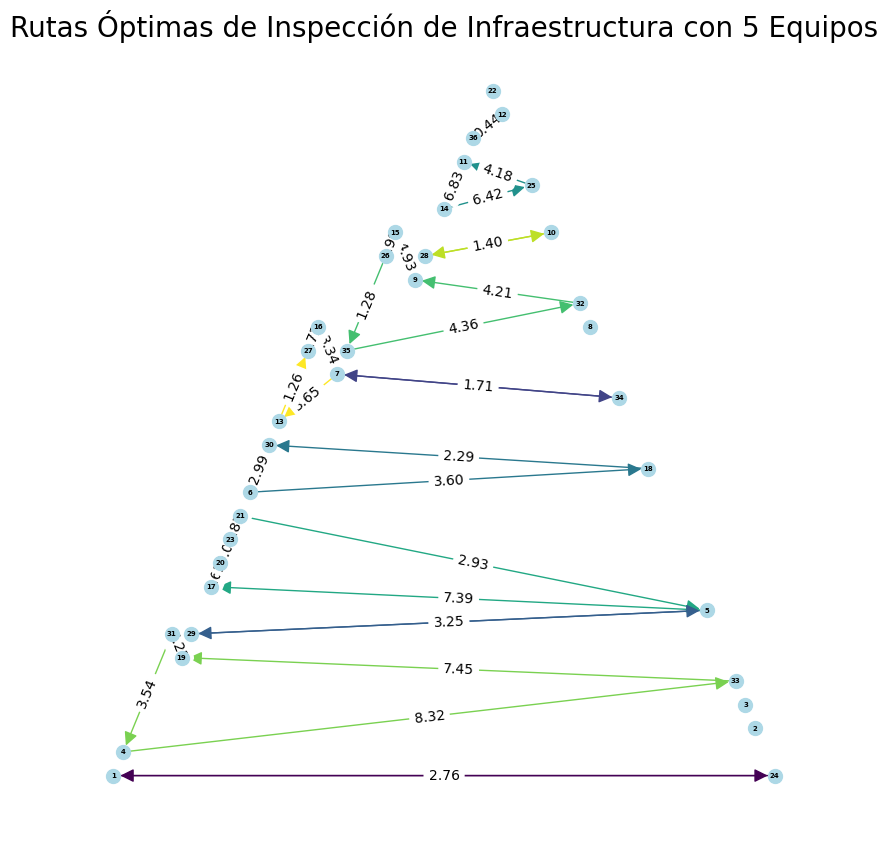

{1: array([-0.85034014, -0.39531368]),
 2: array([ 0.94557823, -0.34089191]),
 3: array([ 0.91836735, -0.31368103]),
 4: array([-0.82312925, -0.3681028 ]),
 5: array([ 0.80952381, -0.20483749]),
 6: array([-0.46938776, -0.06878307]),
 7: array([-0.2244898 ,  0.06727135]),
 8: array([0.4829932 , 0.12169312]),
 9: array([-0.00680272,  0.17611489]),
 10: array([0.37414966, 0.23053666]),
 11: array([0.1292517 , 0.31216931]),
 12: array([0.23809524, 0.36659108]),
 13: array([-0.3877551 ,  0.01284958]),
 14: array([0.07482993, 0.25774754]),
 15: array([-0.06122449,  0.23053666]),
 16: array([-0.27891156,  0.12169312]),
 17: array([-0.57823129, -0.17762661]),
 18: array([ 0.6462585 , -0.04157218]),
 19: array([-0.65986395, -0.25925926]),
 20: array([-0.55102041, -0.15041572]),
 21: array([-0.49659864, -0.09599395]),
 22: array([0.21088435, 0.39380197]),
 23: array([-0.52380952, -0.12320484]),
 24: array([ 1.        , -0.39531368]),
 25: array([0.31972789, 0.28495843]),
 26: array([-0.08843537

In [108]:

# Extraer las rutas seleccionadas
selected_routes = []
for k in model.V:
    routes_for_k = [(i, j) for i in ubicaciones for j in ubicaciones if i != j and round(model.x[i, j, k].value) == 1]
    print(f"Rutas seleccionadas para el viajero {k}: {routes_for_k}")
    selected_routes.append(routes_for_k)

# Crear el grafo usando NetworkX
G = nx.DiGraph()

# Añadir ubicaciones
for i in ubicaciones:
    G.add_node(i)

for k in range(num_vehiculos):
    for route in selected_routes[k]:
        i, j = route
        G.add_edge(i, j, weight=f"{costos_distancia[i-1,j-1]:.2f}",color=k)

# Dibujar el grafo
edges = G.edges()
edge_colors = [G[u][v]['color'] for u, v in edges]
pos = nx.planar_layout(G)  # Usar un layout circular para una visualización clara
labels = nx.get_edge_attributes(G, 'weight')

plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=100, font_size=5, font_weight='bold', arrowsize=20, edge_color=edge_colors)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title("Rutas Óptimas de Inspección de Infraestructura con 5 Equipos", size=20)
plt.show()
pos

In [55]:
!pip install folium


In [114]:
from folium import features
from folium.plugins import AntPath

#from geopy.distance import geodesic

In [121]:

selected_routes = []
for v in model.V:
    routes_for_v = [(i, j) for i in model.N for j in model.N if i != j and np.round(model.x[i, j, v].value) == 1]
    print(f"Rutas seleccionadas para el viajero {v}: {routes_for_v}")
    selected_routes.append(routes_for_v)


coordenadas = {}
for i in ubicaciones:
    coordenadas[i] ={"coor":(ubicaciones_data["Latitude"].iloc[i-1], ubicaciones_data["Longitude"].iloc[i-1])}

colors = ['green', 'orange', 'darkblue','darkred', 'red', 'purple']
node_colors = {}
for v in range(len(model.V)):
    for route in selected_routes[v]:
        i, j = route
        idx_color = v%len(colors)
        if i not in node_colors and i > len(model.D):
            coordenadas[i]["v"] = v
            node_colors[i] = colors[idx_color]
        if j not in node_colors and j > len(model.D):
            coordenadas[j]["v"] = v
            node_colors[j] = colors[idx_color]

# Crear el mapa centrado en la primera ubicación
mapa = folium.Map(location=coordenadas[1]["coor"], zoom_start=11)
for idx in coordenadas:
    lat, lon = coordenadas[idx]["coor"]
    icon, color, v= ("warehouse", 'gray', "") if idx <= len(model.D) else ("home", node_colors.get(idx, "black"), coordenadas[idx].get("v", -2) )

    folium.Marker(
        location=(lat, lon),
        popup=f"Nodo {idx}, v:{v}",
        icon=folium.Icon(color=color, icon=icon, prefix="fa"),
    ).add_to(mapa)

for v in range(len(model.V)):
    for route in selected_routes[v]:
        i, j = route
        idx_color = v%len(colors)
        
        AntPath(
            locations=[coordenadas[i]["coor"], coordenadas[j]["coor"]],
            tooltip=f"Distancia: {costos_distancia[i - 1, j - 1]:.2f} km",
            color= colors[idx_color],
        ).add_to(mapa)
        

# Mostrar el mapa
mapa.save("mapa.html")
mapa

Rutas seleccionadas para el viajero 0: [(24, 1), (1, 24)]
Rutas seleccionadas para el viajero 1: [(36, 12), (12, 36)]
Rutas seleccionadas para el viajero 2: [(34, 7), (7, 34)]
Rutas seleccionadas para el viajero 3: [(29, 5), (5, 29)]
Rutas seleccionadas para el viajero 4: [(18, 30), (30, 6), (6, 18)]
Rutas seleccionadas para el viajero 5: [(14, 25), (25, 11), (11, 14)]
Rutas seleccionadas para el viajero 6: [(17, 20), (20, 23), (21, 5), (23, 21), (5, 17)]
Rutas seleccionadas para el viajero 7: [(15, 26), (26, 35), (32, 9), (35, 32), (9, 15)]
Rutas seleccionadas para el viajero 8: [(19, 31), (31, 4), (33, 19), (4, 33)]
Rutas seleccionadas para el viajero 9: [(28, 10), (10, 28)]
Rutas seleccionadas para el viajero 10: [(13, 27), (16, 7), (27, 16), (7, 13)]
Rutas seleccionadas para el viajero 11: [(22, 10), (10, 22)]
